In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re

# Loading Dataset

In [2]:
df = pd.read_csv('sneakers_Reviews_Dataset.csv',delimiter=';')
df.head()

,review_id,product_id,user_id,rating,review_text,timestamp
0,1,103,16074,3,"Comfortable, but not durable.",2022/11/07 05:30
1,2,436,11648,4,Highly recommend!,2021/09/11 02:53
2,3,861,46508,2,Do not recommend.,2022/12/14 13:24
3,4,271,40094,3,"Comfortable, but not durable.",2021/11/29 04:01
4,5,107,49897,4,Will buy again.,2023/04/24 12:12


In [3]:
df.shape

(100000, 6)

# Data Cleaning and EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    100000 non-null  int64 
 1   product_id   100000 non-null  int64 
 2   user_id      100000 non-null  int64 
 3   rating       100000 non-null  int64 
 4   review_text  100000 non-null  object
 5   timestamp    100000 non-null  object
dtypes: int64(4), object(2)
memory usage: 4.6+ MB


In [5]:
df.isnull().sum()

review_id      0
product_id     0
user_id        0
rating         0
review_text    0
timestamp      0
dtype: int64

There's no null values that's good for us

In [6]:
#Now Let's drop the columns we don't need!
df.drop(['review_id',	'product_id',	'user_id','timestamp'], axis=1, inplace=True)
df.head()

,rating,review_text
0,3,"Comfortable, but not durable."
1,4,Highly recommend!
2,2,Do not recommend.
3,3,"Comfortable, but not durable."
4,4,Will buy again.


In [7]:
#Simplifying the names of columns
df.columns = ['sentiment', 'text']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  100000 non-null  int64 
 1   text       100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [9]:
df['sentiment'].value_counts()

4    20096
2    20066
5    20006
3    19924
1    19908
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='Count'>

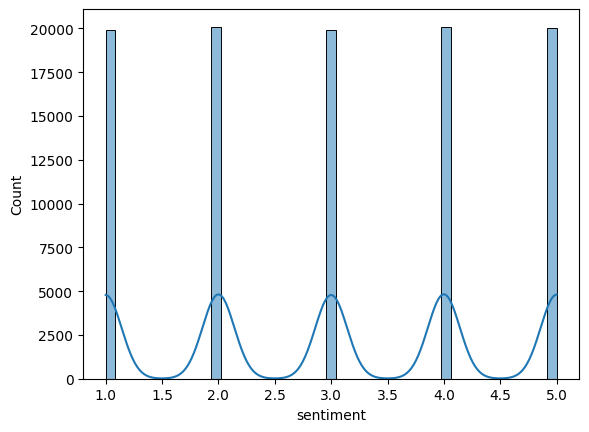

In [10]:
#Let's see some visuals
sns.histplot(df['sentiment'], kde=True)

<Axes: xlabel='sentiment', ylabel='count'>

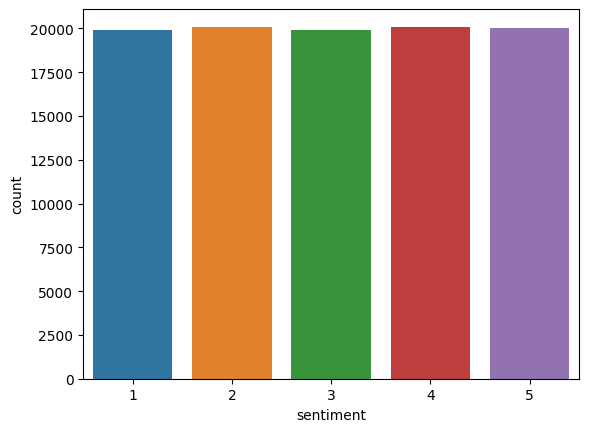

In [11]:
sns.countplot(x=df['sentiment'])

# Text Preprocessing

In [13]:
import nltk

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
from nltk.corpus import stopwords

In [16]:
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

100000
Comfortable, but not durable.


In [17]:
final_corpus = []
final_corpus_joined = []
for i in df.index:
    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    text = text.lower()
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text=re.sub("(\\d|\\W)+"," ",text)
    text = text.split()
    lem = SnowballStemmer("english")
    text = [lem.stem(word) for word in text if not word in stuff_to_be_removed]
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

In [18]:
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["sentiment"] = df["sentiment"].values

In [19]:
data_cleaned

,text,sentiment
0,comfort durabl,3
1,high recommend,4
2,recommend,2
3,comfort durabl,3
4,buy,4
...,...,...
99995,fall apart week,1
99996,high recommend,5
99997,buy,5
99998,wast money,1


In [20]:
#This df is created for wordcloud only
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = df['sentiment'].values
data_eda.head()

,text,sentiment
0,"[comfort, durabl]",3
1,"[high, recommend]",4
2,[recommend],2
3,"[comfort, durabl]",3
4,[buy],4


# Word Cloud

In [25]:
strong_positive = data_eda[data_eda['sentiment'] == 5]
strong_positive_list = strong_positive['text'].tolist()

positive = data_eda[data_eda['sentiment'] == 4]
positive_list = positive['text'].tolist()

neutral = data_eda[data_eda['sentiment'] == 3]
neutral_list = neutral['text'].tolist()

negative = data_eda[data_eda['sentiment'] == 2]
negative_list = negative['text'].tolist()

strong_negative = data_eda[data_eda['sentiment'] == 1]
strong_negative_list = strong_negative['text'].tolist()

In [26]:
strong_positive_all = " ".join([word for sent in strong_positive_list for word in sent ])
strong_negative_all = " ".join([word for sent in strong_negative_list for word in sent ])
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])
neutral_all = " ".join([word for sent in neutral_list for word in sent ])

**For Positives**

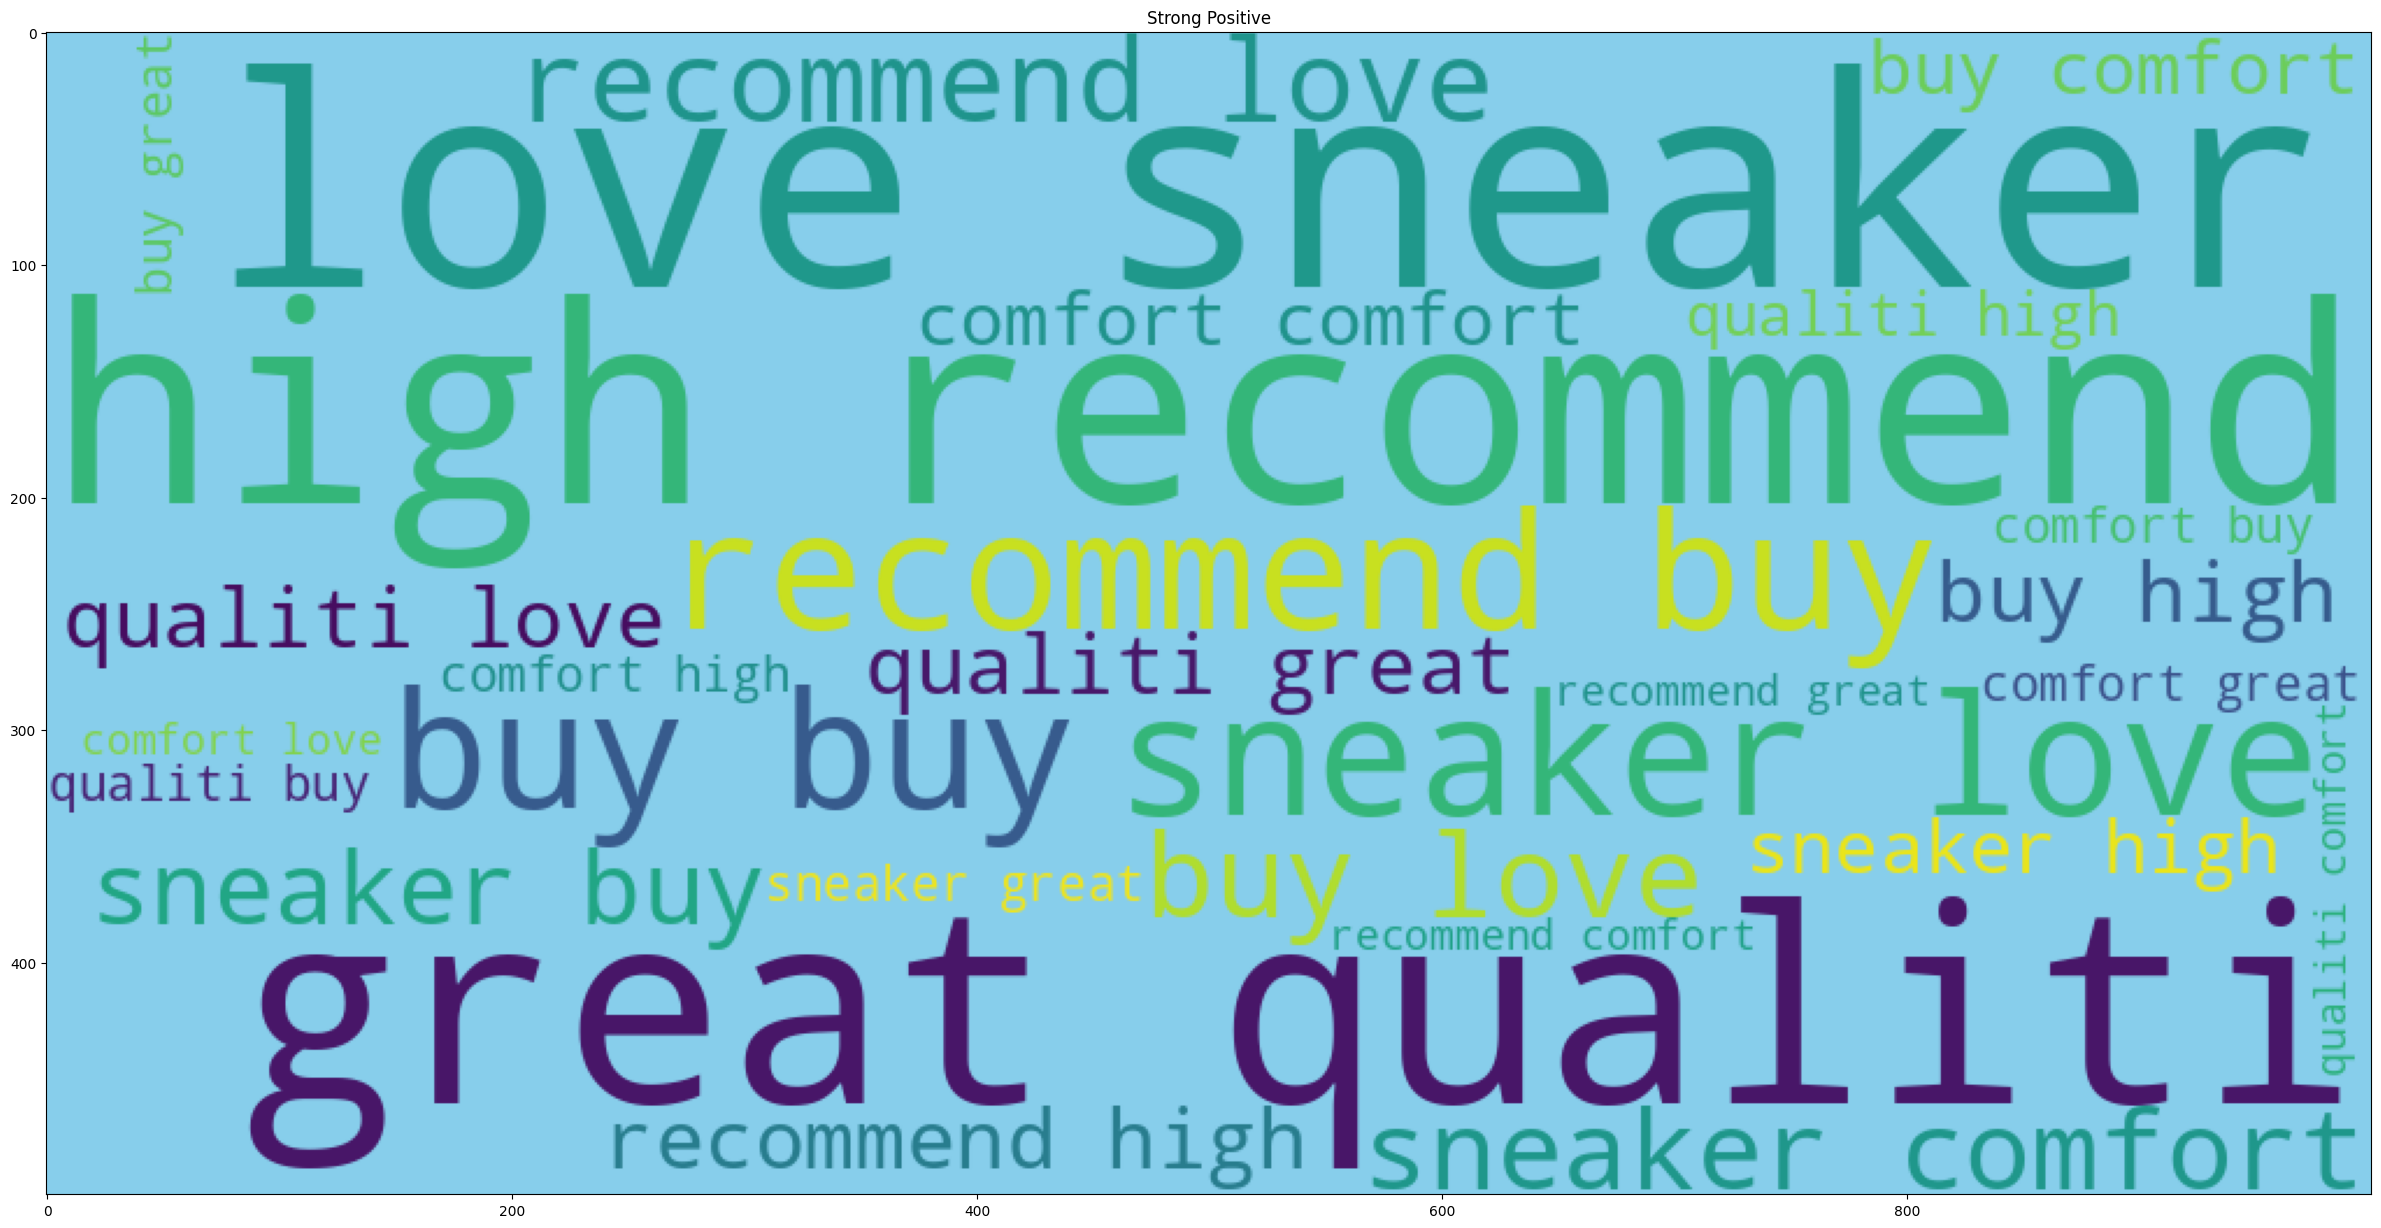

In [29]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(strong_positive_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("Strong Positive")
plt.show()

**For Negatives**

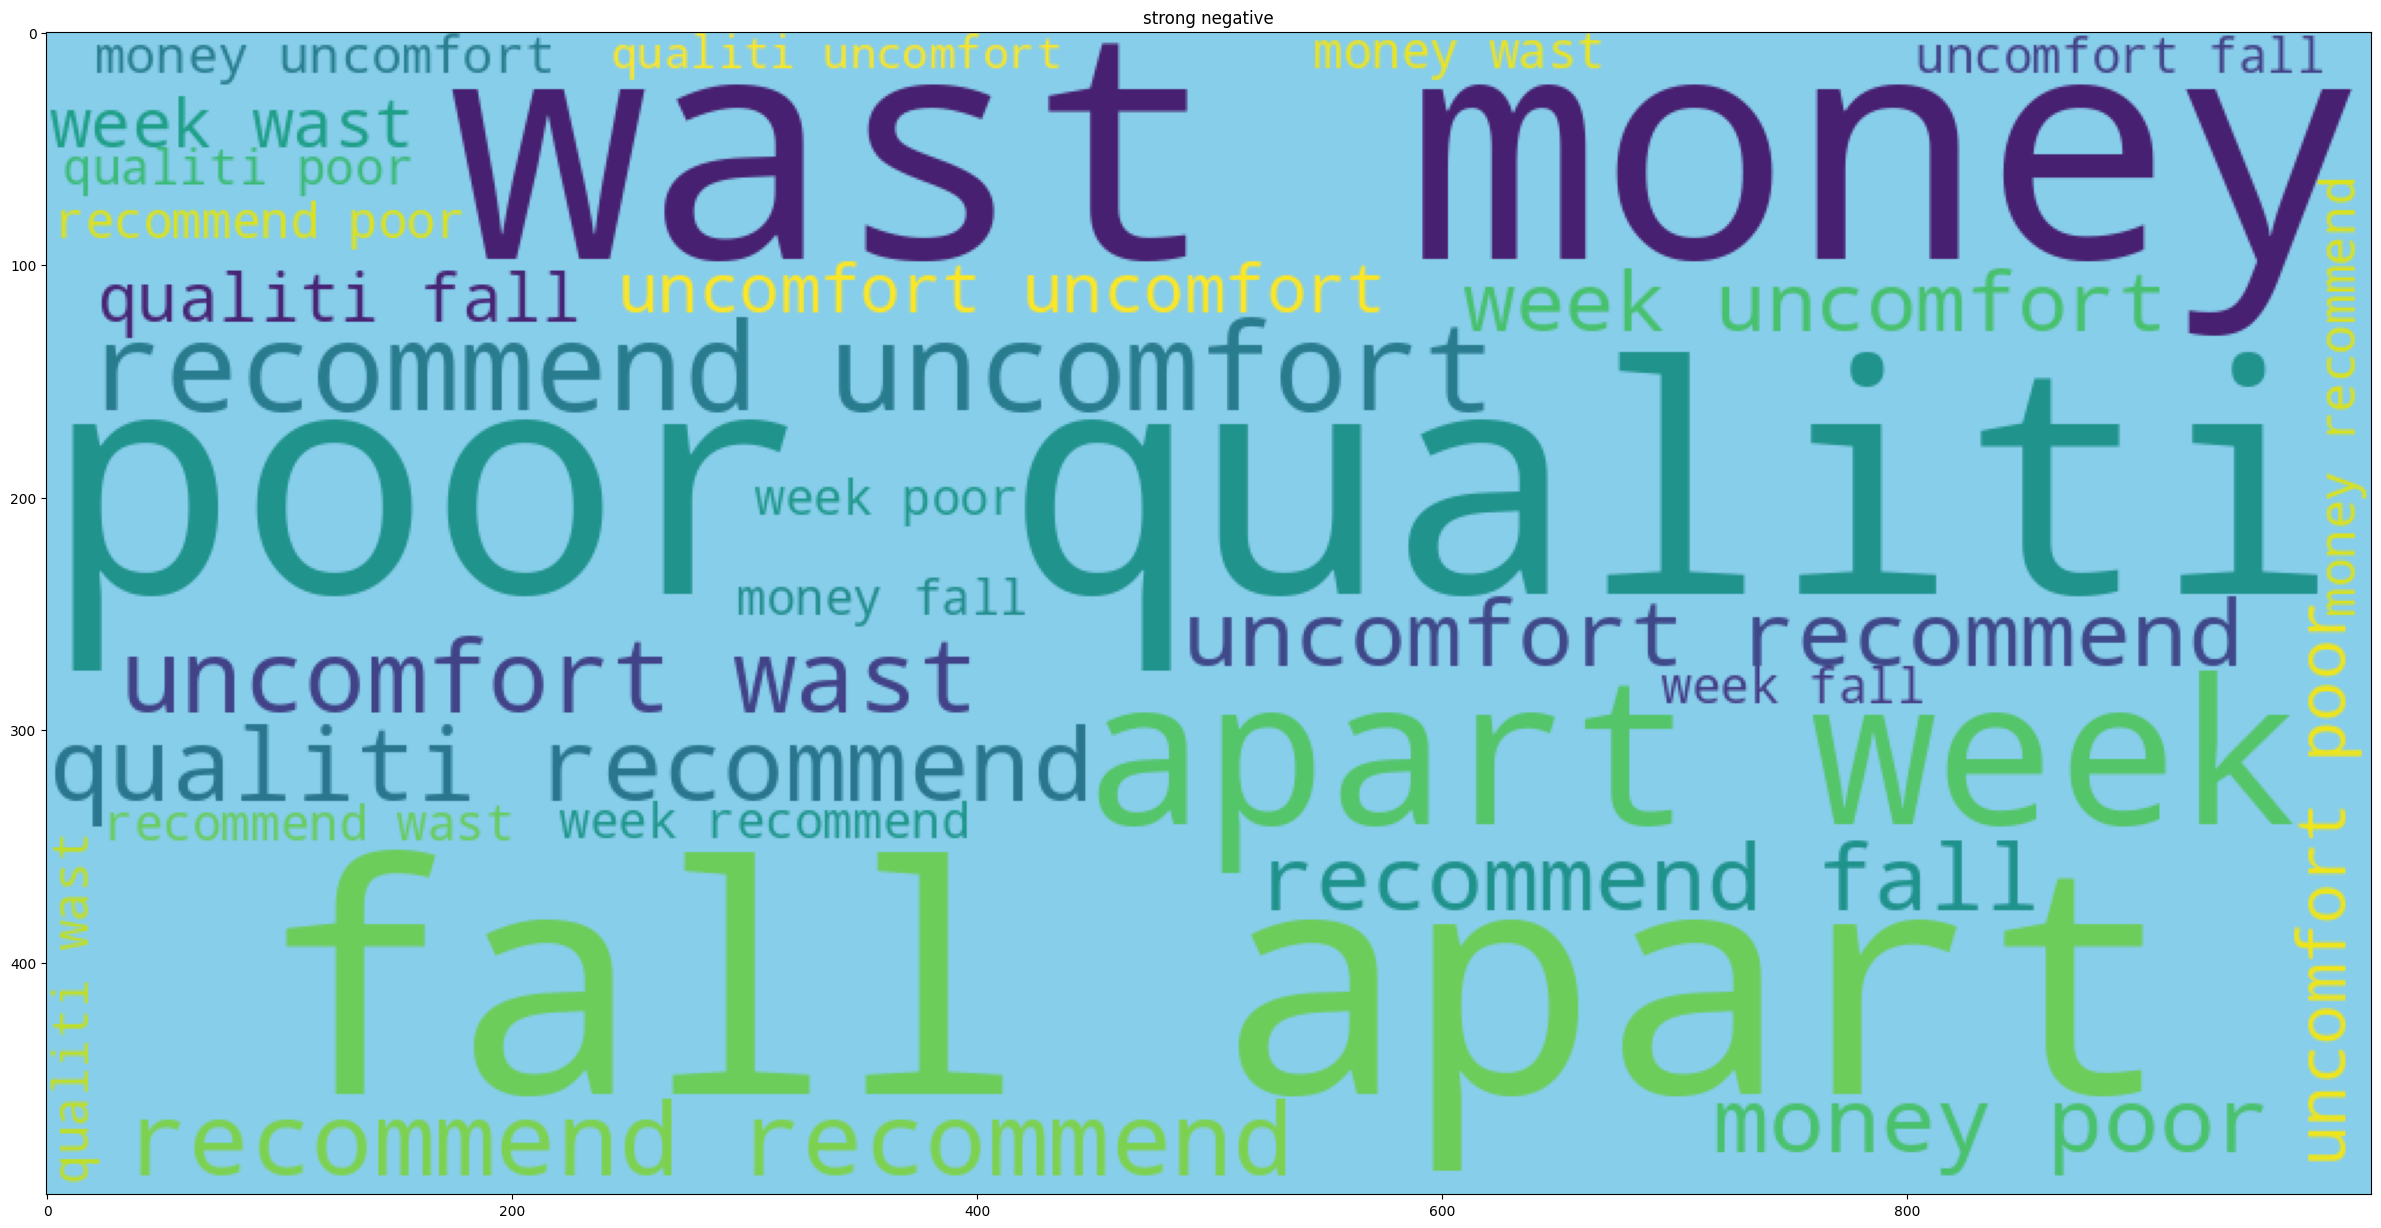

In [28]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(strong_negative_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("strong negative")
plt.show()

# Model Building

In [30]:
X = data_cleaned['text']
y = data_cleaned['sentiment']

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
Xt = tfid.fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2, random_state= 42)

**Logistic Regression**

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred = model.predict(X_test)

In [35]:
#Showing Model Summary
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.51      0.40      0.45      4047
           2       0.50      0.61      0.55      3978
           3       1.00      1.00      1.00      3950
           4       0.51      0.41      0.45      4031
           5       0.51      0.61      0.55      3994

    accuracy                           0.60     20000
   macro avg       0.61      0.61      0.60     20000
weighted avg       0.60      0.60      0.60     20000



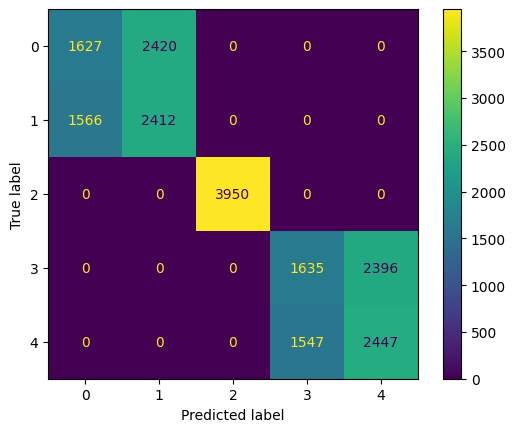

In [36]:
#Visualizing Model Results
t1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
t1.plot()

# Save Model

In [37]:
import joblib

# Load the trained model
model_filename = 'logistic_regression_model.pkl'
joblib.dump(model, model_filename)

['logistic_regression_model.pkl']

# Testing My Own Text

In [38]:
model_filename = 'logistic_regression_model.pkl'
model = joblib.load(model_filename)

In [57]:
input_text = "i love this sneaker, and i recommend you guys to buy it"

In [58]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()

    # Tokenize the text
    text = text.split()

    # Initialize a stemmer
    stemmer = SnowballStemmer("english")

    # Remove stopwords and apply stemming
    stuff_to_be_removed = set(stopwords.words('english')) | set(punctuation)
    text = [stemmer.stem(word) for word in text if word not in stuff_to_be_removed]

    # Join the processed tokens into a single string
    text = " ".join(text)

    return text

In [59]:
# Preprocess the input text
preprocessed_text = preprocess_text(input_text)

In [60]:
preprocessed_text

'love sneaker recommend guy buy'

In [66]:
input_vector = tfid.transform([preprocessed_text])

In [70]:
input_vector

<1x19 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [71]:
# Make predictions
predicted_class = model.predict(input_vector)

In [72]:
print(f"Predicted Class: {predicted_class}")

Predicted Class: [5]


In [73]:
def predict_class(input_text):
    # Preprocess the input text
    preprocessed_text = preprocess_text(input_text)

    # Transform the preprocessed text using the pre-fitted vectorizer
    input_vector = tfid.transform([preprocessed_text])

    # Make predictions
    predicted_class = model.predict(input_vector)[0]

    return predicted_class

In [74]:
predict_class("i hate this product")

2